Epoch 1/30
600/600 [==============================] - 2s 2ms/step - loss: 0.5195 - accuracy: 0.7872 - val_loss: 0.4665 - val_accuracy: 0.8081
Epoch 2/30
600/600 [==============================] - 1s 2ms/step - loss: 0.4728 - accuracy: 0.8036 - val_loss: 0.4525 - val_accuracy: 0.8158
Epoch 3/30
600/600 [==============================] - 1s 2ms/step - loss: 0.4604 - accuracy: 0.8096 - val_loss: 0.4492 - val_accuracy: 0.8158
Epoch 4/30
600/600 [==============================] - 1s 2ms/step - loss: 0.4557 - accuracy: 0.8088 - val_loss: 0.4460 - val_accuracy: 0.8167
Epoch 5/30
600/600 [==============================] - 1s 2ms/step - loss: 0.4516 - accuracy: 0.8120 - val_loss: 0.4454 - val_accuracy: 0.8177
Epoch 6/30
600/600 [==============================] - 1s 2ms/step - loss: 0.4499 - accuracy: 0.8124 - val_loss: 0.4444 - val_accuracy: 0.8175
Epoch 7/30
600/600 [==============================] - 1s 2ms/step - loss: 0.4483 - accuracy: 0.8117 - val_loss: 0.4441 - val_accuracy: 0.8181
Epoch 

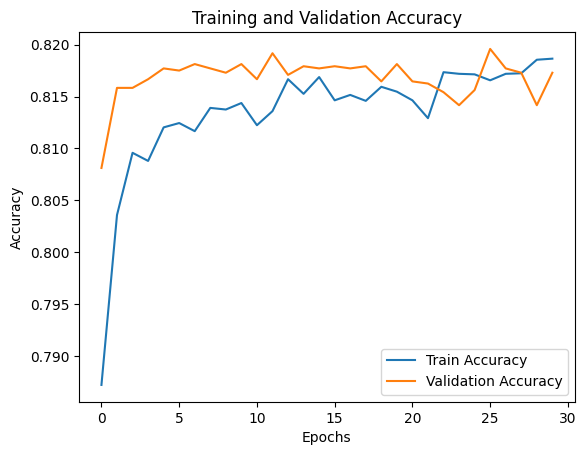

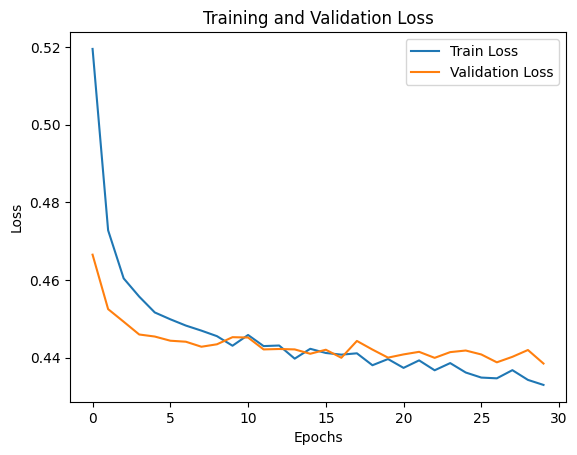

188/188 [==============================] - 0s 1ms/step - loss: 0.4331 - accuracy: 0.8177
Test Accuracy: 0.8176666498184204
188/188 [==============================] - 0s 1ms/step
Adjusted Recall: 0.5064737242955065
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4687
           1       0.55      0.51      0.53      1313

    accuracy                           0.80      6000
   macro avg       0.70      0.69      0.70      6000
weighted avg       0.79      0.80      0.80      6000

Confusion Matrix:
[[4133  554]
 [ 648  665]]


In [ ]:
# Loading in libraries i will use
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, recall_score

# Load CSV data from excel sheet
# header=1 to ignore initial header of X1, X2...
df = pd.read_excel('/content/CCD.xls', sheet_name='Data', header=1)

# Convert any non-numeric columns to numeric to handle categorical data
df = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df.drop('default payment next month', axis=1)
y = df['default payment next month']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardising the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build neural network model w/ dropout layers
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # dropout layer
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # dropout layer
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training model
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Plot training accuracy and loss on graph for visual feedback to make it easaseir to seee
# Trainging and Validation Accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Training and Validtion loss graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate model on the test set
accuracy = model.evaluate(X_test_scaled, y_test)[1]
print(f"Test Accuracy: {accuracy}")

# Adjust classification threshold and calculate adjusted recall
threshold = 0.3
y_pred_prob = model.predict(X_test_scaled)
y_pred_adjusted = (y_pred_prob > threshold).astype(int)
adjusted_recall = recall_score(y_test, y_pred_adjusted)
print(f"Adjusted Recall: {adjusted_recall}")

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_adjusted))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
print("Confusion Matrix:")
print(conf_matrix)

